In [57]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy.stats.stats import pearsonr
import matplotlib.pyplot as plt

In [2]:
train_identity = pd.read_csv('Data/train_identity.csv')
train_transaction = pd.read_csv('Data/train_transaction.csv')

In [3]:
print(train_identity.shape)
print(train_transaction.shape)

(144233, 41)
(590540, 394)


In [4]:
pd.set_option('display.max_columns',None)
train_identity.head()

,TransactionID,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,id_10,id_11,id_12,id_13,id_14,id_15,id_16,id_17,id_18,id_19,id_20,id_21,id_22,id_23,id_24,id_25,id_26,id_27,id_28,id_29,id_30,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987004,0.0,70787.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.0,NotFound,NaN,-480.0,New,NotFound,166.0,NaN,542.0,144.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New,NotFound,Android 7.0,samsung browser 6.2,32.0,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M
1,2987008,-5.0,98945.0,NaN,NaN,0.0,-5.0,NaN,NaN,NaN,NaN,100.0,NotFound,49.0,-300.0,New,NotFound,166.0,NaN,621.0,500.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New,NotFound,iOS 11.1.2,mobile safari 11.0,32.0,1334x750,match_status:1,T,F,F,T,mobile,iOS Device
2,2987010,-5.0,191631.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,100.0,NotFound,52.0,NaN,Found,Found,121.0,NaN,410.0,142.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Found,Found,NaN,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,Windows
3,2987011,-5.0,221832.0,NaN,NaN,0.0,-6.0,NaN,NaN,NaN,NaN,100.0,NotFound,52.0,NaN,New,NotFound,225.0,NaN,176.0,507.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New,NotFound,NaN,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,NaN
4,2987016,0.0,7460.0,0.0,0.0,1.0,0.0,NaN,NaN,0.0,0.0,100.0,NotFound,NaN,-300.0,Found,Found,166.0,15.0,529.0,575.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Found,Found,Mac OS X 10_11_6,chrome 62.0,24.0,1280x800,match_status:2,T,F,T,T,desktop,MacOS


In [5]:
train_transaction.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,dist2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,D15,M1,M2,M3,M4,M5,M6,M7,M8,M9,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,V41,V42,V43,V44,V45,V46,V47,V48,V49,V50,V51,V52,V53,V54,V55,V56,V57,V58,V59,V60,V61,V62,V63,V64,V65,V66,V67,V68,V69,V70,V71,V72,V73,V74,V75,V76,V77,V78,V79,V80,V81,V82,V83,V84,V85,V86,V87,V88,V89,V90,V91,V92,V93,V94,V95,V96,V97,V98,V99,V100,V101,V102,V103,V104,V105,V106,V107,V108,V109,V110,V111,V112,V113,V114,V115,V116,V117,V118,V119,V120,V121,V122,V123,V124,V125,V126,V127,V128,V129,V130,V131,V132,V133,V134,V135,V136,V137,V138,V139,V140,V141,V142,V143,V144,V145,V146,V147,V148,V149,V150,V151,V152,V153,V154,V155,V156,V157,V158,V159,V160,V161,V162,V163,V164,V165,V166,V167,V168,V169,V170,V171,V172,V173,V174,V175,V176,V177,V178,V179,V180,V181,V182,V183,V184,V185,V186,V187,V188,V189,V190,V191,V192,V193,V194,V195,V196,V197,V198,V199,V200,V201,V202,V203,V204,V205,V206,V207,V208,V209,V210,V211,V212,V213,V214,V215,V216,V217,V218,V219,V220,V221,V222,V223,V224,V225,V226,V227,V228,V229,V230,V231,V232,V233,V234,V235,V236,V237,V238,V239,V240,V241,V242,V243,V244,V245,V246,V247,V248,V249,V250,V251,V252,V253,V254,V255,V256,V257,V258,V259,V260,V261,V262,V263,V264,V265,V266,V267,V268,V269,V270,V271,V272,V273,V274,V275,V276,V277,V278,V279,V280,V281,V282,V283,V284,V285,V286,V287,V288,V289,V290,V291,V292,V293,V294,V295,V296,V297,V298,V299,V300,V301,V302,V303,V304,V305,V306,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321,V322,V323,V324,V325,V326,V327,V328,V329,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,credit,315.0,87.0,19.0,NaN,NaN,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2.0,0.0,1.0,1.0,14.0,NaN,13.0,NaN,NaN,NaN,NaN,NaN,NaN,13.0,13.0,NaN,NaN,NaN,0.0,T,T,T,M2,F,T,NaN,NaN,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,117.0,0.0,0.0,0.0,0.0,0.0,117.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,117.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,credit,325.0,87.0,NaN,NaN,gmail.com,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,M0,T,T,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,

In [6]:
identity_vars = list(train_identity)
transaction_vars = list(train_transaction)
print(identity_vars)
print(transaction_vars)

['TransactionID', 'id_01', 'id_02', 'id_03', 'id_04', 'id_05', 'id_06', 'id_07', 'id_08', 'id_09', 'id_10', 'id_11', 'id_12', 'id_13', 'id_14', 'id_15', 'id_16', 'id_17', 'id_18', 'id_19', 'id_20', 'id_21', 'id_22', 'id_23', 'id_24', 'id_25', 'id_26', 'id_27', 'id_28', 'id_29', 'id_30', 'id_31', 'id_32', 'id_33', 'id_34', 'id_35', 'id_36', 'id_37', 'id_38', 'DeviceType', 'DeviceInfo']
['TransactionID', 'isFraud', 'TransactionDT', 'TransactionAmt', 'ProductCD', 'card1', 'card2', 'card3', 'card4', 'card5', 'card6', 'addr1', 'addr2', 'dist1', 'dist2', 'P_emaildomain', 'R_emaildomain', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12', 'C13', 'C14', 'D1', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 'D8', 'D9', 'D10', 'D11', 'D12', 'D13', 'D14', 'D15', 'M1', 'M2', 'M3', 'M4', 'M5', 'M6', 'M7', 'M8', 'M9', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26',

In [7]:
trans_id = train_transaction['TransactionID']
fraud = train_transaction['isFraud']
x_trans = train_transaction.drop(['TransactionID','isFraud'],axis=1)

Upon a casual inspection, multiple obstacles with this dataset can be identified. 

1. Dimensionality: 
    - There are hundreds of variables
2. Many NaNs
    - Many values are simply missing
3. Not all transactions have corresponding identity information.
    - Identity dataset gives characteristics about the individuals(?)
    - Useful information to have, but can't be paired up with all the transaction data
4. Unlabelled or minimal description of variables
    - The description on kaggle is not very informative
    - This is understandable given the private nature of the data
    - Affects how we would deal with the other three problems
    
    
How can we deal with these issues?
1. Dimensionality
    - Dimensionality Reduction Techniques e.g. Principal Component Analysis, Discriminant Analysis
    - Feature Selection e.g. Lasso
2. NaNs
    - No standard way to deal with it
    - Can potentially work only with rows with complete information
    - Drop variables which are predominately NaN
    - Replace with Mean/Median/Mode
    - Solution depends on what the variables are, difficult in this case because we don't know most of them
3. Not all transactions have corresponding identity information
    - Work with data that is only with individual characteristics
4. Unlabelled or minimal description of variables
    - While I would be good to understand how the features relate to the target variables, we might have to be content with a 'black box' approach
    
First thing to do is see how our NaNs are distributed across the variables.    


In [8]:
identity_na_count = train_identity.isnull().sum()
identity_na_prop = train_identity.isnull().sum()/train_identity.shape[0]*100
identity_na = pd.concat([identity_na_count, identity_na_prop], axis=1)
identity_na.columns = ['Count','Percentage']
print(identity_na)

                Count  Percentage
TransactionID       0    0.000000
id_01               0    0.000000
id_02            3361    2.330257
id_03           77909   54.016071
id_04           77909   54.016071
id_05            7368    5.108401
id_06            7368    5.108401
id_07          139078   96.425922
id_08          139078   96.425922
id_09           69307   48.052110
id_10           69307   48.052110
id_11            3255    2.256765
id_12               0    0.000000
id_13           16913   11.726165
id_14           64189   44.503685
id_15            3248    2.251912
id_16           14893   10.325654
id_17            4864    3.372321
id_18           99120   68.722137
id_19            4915    3.407681
id_20            4972    3.447200
id_21          139074   96.423149
id_22          139064   96.416215
id_23          139064   96.416215
id_24          139486   96.708798
id_25          139101   96.441868
id_26          139070   96.420375
id_27          139064   96.416215
id_28         

We should also be aware what type of variables we have i.e. strings, floats etc

In [9]:
train_identity.dtypes

TransactionID      int64
id_01            float64
id_02            float64
id_03            float64
id_04            float64
id_05            float64
id_06            float64
id_07            float64
id_08            float64
id_09            float64
id_10            float64
id_11            float64
id_12             object
id_13            float64
id_14            float64
id_15             object
id_16             object
id_17            float64
id_18            float64
id_19            float64
id_20            float64
id_21            float64
id_22            float64
id_23             object
id_24            float64
id_25            float64
id_26            float64
id_27             object
id_28             object
id_29             object
id_30             object
id_31             object
id_32            float64
id_33             object
id_34             object
id_35             object
id_36             object
id_37             object
id_38             object
DeviceType        object


Looks like a mixture of strings and floats, we'll repeat the same process for the transaction data.

In [10]:
transaction_na_count = train_transaction.isnull().sum()
transaction_na_prop = train_transaction.isnull().sum()/train_transaction.shape[0]*100
transaction_na = pd.concat([transaction_na_count, transaction_na_prop], axis=1)
transaction_na.columns = ['Count','Percentage']
print(transaction_na)

                 Count  Percentage
TransactionID        0    0.000000
isFraud              0    0.000000
TransactionDT        0    0.000000
TransactionAmt       0    0.000000
ProductCD            0    0.000000
card1                0    0.000000
card2             8933    1.512683
card3             1565    0.265012
card4             1577    0.267044
card5             4259    0.721204
card6             1571    0.266028
addr1            65706   11.126427
addr2            65706   11.126427
dist1           352271   59.652352
dist2           552913   93.628374
P_emaildomain    94456   15.994852
R_emaildomain   453249   76.751617
C1                   0    0.000000
C2                   0    0.000000
C3                   0    0.000000
C4                   0    0.000000
C5                   0    0.000000
C6                   0    0.000000
C7                   0    0.000000
C8                   0    0.000000
C9                   0    0.000000
C10                  0    0.000000
C11                 

In [11]:
train_transaction.dtypes

TransactionID       int64
isFraud             int64
TransactionDT       int64
TransactionAmt    float64
ProductCD          object
card1               int64
card2             float64
card3             float64
card4              object
card5             float64
card6              object
addr1             float64
addr2             float64
dist1             float64
dist2             float64
P_emaildomain      object
R_emaildomain      object
C1                float64
C2                float64
C3                float64
C4                float64
C5                float64
C6                float64
C7                float64
C8                float64
C9                float64
C10               float64
C11               float64
C12               float64
C13               float64
                   ...   
V310              float64
V311              float64
V312              float64
V313              float64
V314              float64
V315              float64
V316              float64
V317        

We have a mixture of integers, floats and strings. Next we'll do some univariate exploratory data analysis on the identity data.

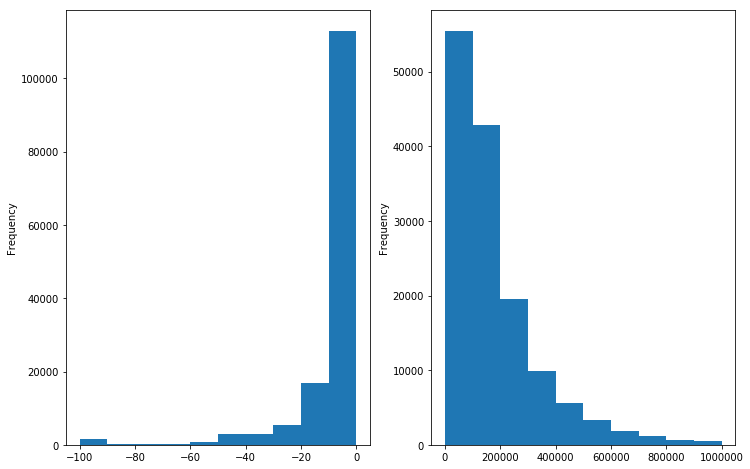

In [12]:
fig, axarr = plt.subplots(1, 2, figsize=(12,8))

train_identity['id_01'].plot.hist(ax=axarr[0])
train_identity['id_02'].plot.hist(ax=axarr[1])

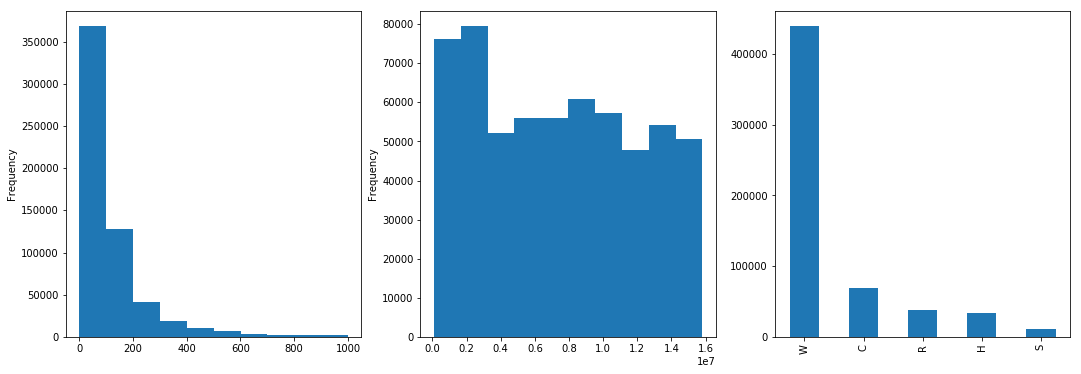

In [13]:
fig, axarr = plt.subplots(1, 3, figsize=(18,6))

train_transaction[train_transaction['TransactionAmt']<1000]['TransactionAmt'].plot.hist(ax=axarr[0])
train_transaction['TransactionDT'].plot.hist(ax=axarr[1])
train_transaction['ProductCD'].value_counts().plot.bar(ax=axarr[2])

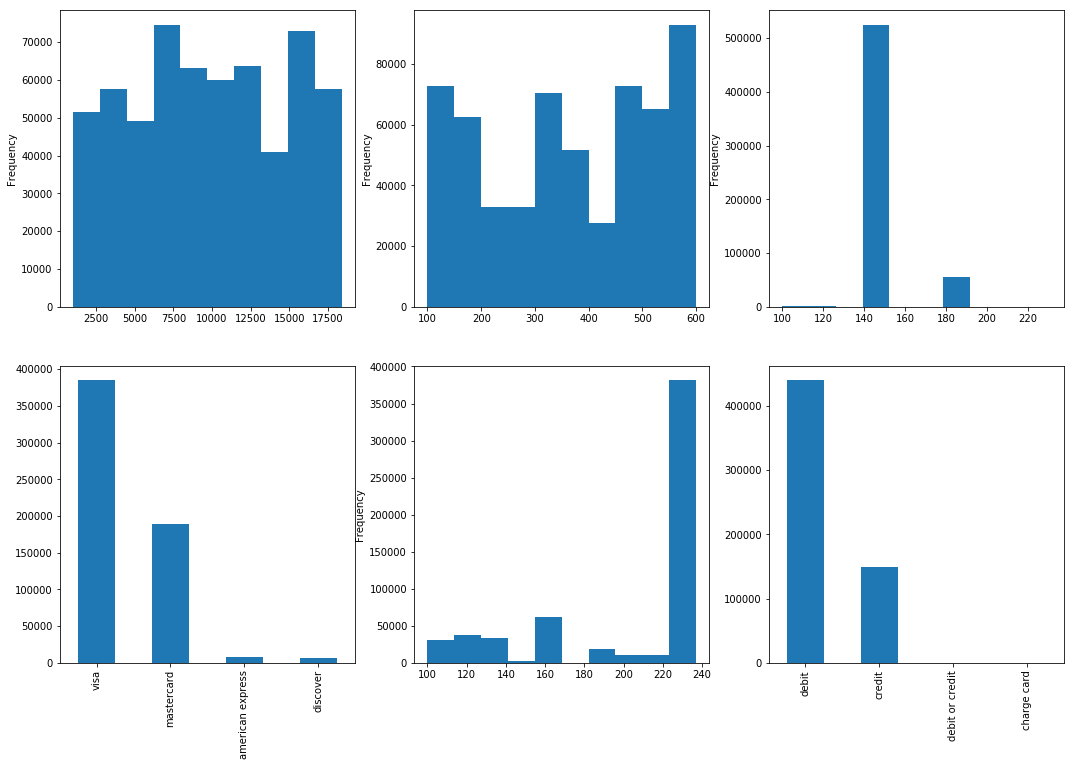

In [14]:
#Card details
fig, axarr = plt.subplots(2, 3, figsize=(18,12))

train_transaction['card1'].plot.hist(ax=axarr[0][0])
train_transaction['card2'].plot.hist(ax=axarr[0][1])
train_transaction['card3'].plot.hist(ax=axarr[0][2])
train_transaction['card4'].value_counts().head(10).plot.bar(ax=axarr[1][0])
train_transaction['card5'].plot.hist(ax=axarr[1][1])
train_transaction['card6'].value_counts().head(10).plot.bar(ax=axarr[1][2])

From the competition hoster: "card1 - card6: payment card information, such as card type, card category, issue bank, country, etc."
- card1 is likely to be the issue bank, approx 18000 unique values cf. https://www.quora.com/How-many-banks-are-there-in-the-world-1
- card3/5 seem to be related to each other and may have something to do with the country of issue
    - card 3 has 114 unique values
    - card 5 has 119 unique values
    - They both range from 0 to 240
    - There are 195 countries in the world and 206 sovereign states(?)
    - Card 3 has a large amount of values at the value 185, if you list all countries by alphabetical order, the US places at 187...

In [15]:
print(train_transaction['card3'].value_counts())
print(train_transaction['card5'].value_counts())

150.0    521287
185.0     56346
106.0      1571
146.0      1252
144.0      1252
117.0       962
143.0       899
119.0       750
102.0       460
147.0       390
162.0       339
203.0       253
213.0       221
100.0       202
200.0       184
188.0       175
131.0       172
134.0       166
149.0       127
135.0       120
229.0       118
210.0       104
195.0       101
121.0        99
159.0        82
197.0        81
137.0        71
138.0        70
214.0        66
148.0        61
          ...  
205.0         3
225.0         3
202.0         3
207.0         3
174.0         3
181.0         3
179.0         2
206.0         2
208.0         2
193.0         2
220.0         2
186.0         2
226.0         2
176.0         2
224.0         1
173.0         1
201.0         1
170.0         1
125.0         1
132.0         1
199.0         1
172.0         1
209.0         1
101.0         1
175.0         1
228.0         1
139.0         1
114.0         1
164.0         1
221.0         1
Name: card3, Length: 114

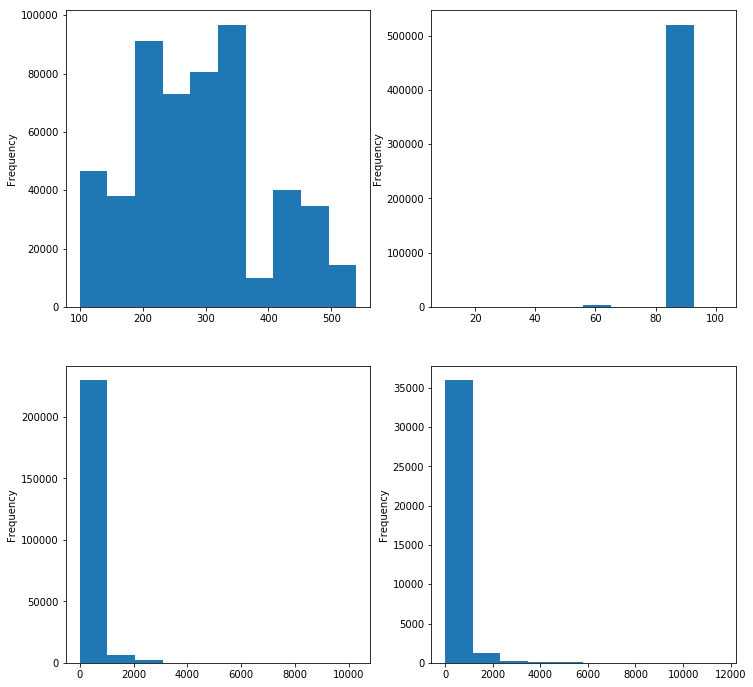

In [16]:
#Distance and address
fig, axarr = plt.subplots(2, 2, figsize=(12,12))

train_transaction['addr1'].plot.hist(ax=axarr[0][0])
train_transaction['addr2'].plot.hist(ax=axarr[0][1])
train_transaction['dist1'].plot.hist(ax=axarr[1][0])
train_transaction['dist2'].plot.hist(ax=axarr[1][1])

I have a sneaking suspicion that addr1 and addr2 can be combined to form a zip code

In [17]:
print(train_transaction[['addr2','addr1']])

        addr2  addr1
0        87.0  315.0
1        87.0  325.0
2        87.0  330.0
3        87.0  476.0
4        87.0  420.0
5        87.0  272.0
6        87.0  126.0
7        87.0  325.0
8        87.0  337.0
9        87.0  204.0
10        NaN    NaN
11        NaN    NaN
12       87.0  204.0
13       87.0  330.0
14       87.0  226.0
15       87.0  315.0
16       87.0  170.0
17       87.0  204.0
18       87.0  184.0
19       87.0  264.0
20       87.0  299.0
21       87.0  204.0
22       87.0  299.0
23       87.0  126.0
24       87.0  264.0
25       87.0  441.0
26       87.0  472.0
27       87.0  337.0
28       87.0  251.0
29       87.0  204.0
...       ...    ...
590510   87.0  204.0
590511   87.0  110.0
590512   87.0  110.0
590513   87.0  315.0
590514   87.0  337.0
590515   87.0  472.0
590516   87.0  204.0
590517   87.0  110.0
590518   87.0  272.0
590519   87.0  264.0
590520   87.0  204.0
590521    NaN    NaN
590522   87.0  325.0
590523   87.0  299.0
590524   87.0  387.0
590525   87.0

Turns out I was wrong (or so I think)

In [18]:
print(train_transaction['addr1'].describe())
print(train_transaction['addr2'].describe())

count    524834.000000
mean        290.733794
std         101.741072
min         100.000000
25%         204.000000
50%         299.000000
75%         330.000000
max         540.000000
Name: addr1, dtype: float64
count    524834.000000
mean         86.800630
std           2.690623
min          10.000000
25%          87.000000
50%          87.000000
75%          87.000000
max         102.000000
Name: addr2, dtype: float64


In [19]:
print(train_transaction['dist1'].describe())
print(train_transaction['dist2'].describe())

count    238269.000000
mean        118.502180
std         371.872026
min           0.000000
25%           3.000000
50%           8.000000
75%          24.000000
max       10286.000000
Name: dist1, dtype: float64
count    37627.000000
mean       231.855423
std        529.053494
min          0.000000
25%          7.000000
50%         37.000000
75%        206.000000
max      11623.000000
Name: dist2, dtype: float64


Distances seem somewhat consistent with the overall land size of the US when measured in kms. 

Let's investigate the email domains

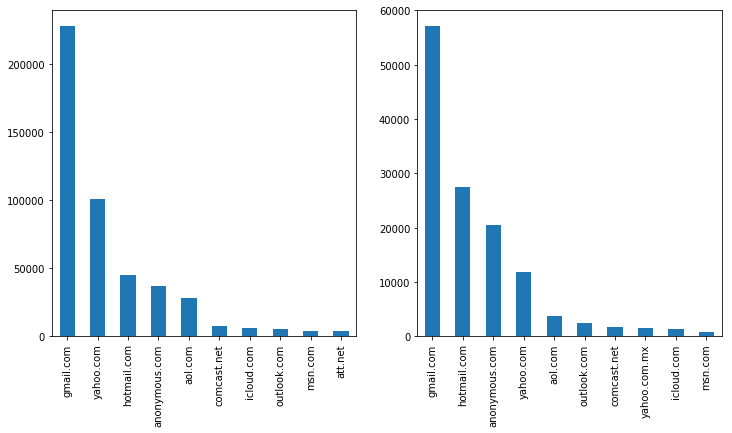

In [46]:
fig, axarr = plt.subplots(1,2,figsize=(12,6))
train_transaction['P_emaildomain'].value_counts().head(10).plot.bar(ax=axarr[0])
train_transaction['R_emaildomain'].value_counts().head(10).plot.bar(ax=axarr[1])

Both purchaser and recipient are most likely to use gmail, yahoo and hotmail. For recpients, they are more likely to use anonymous.com than the purchaser. 

In [ ]:
Moving onto the C variables

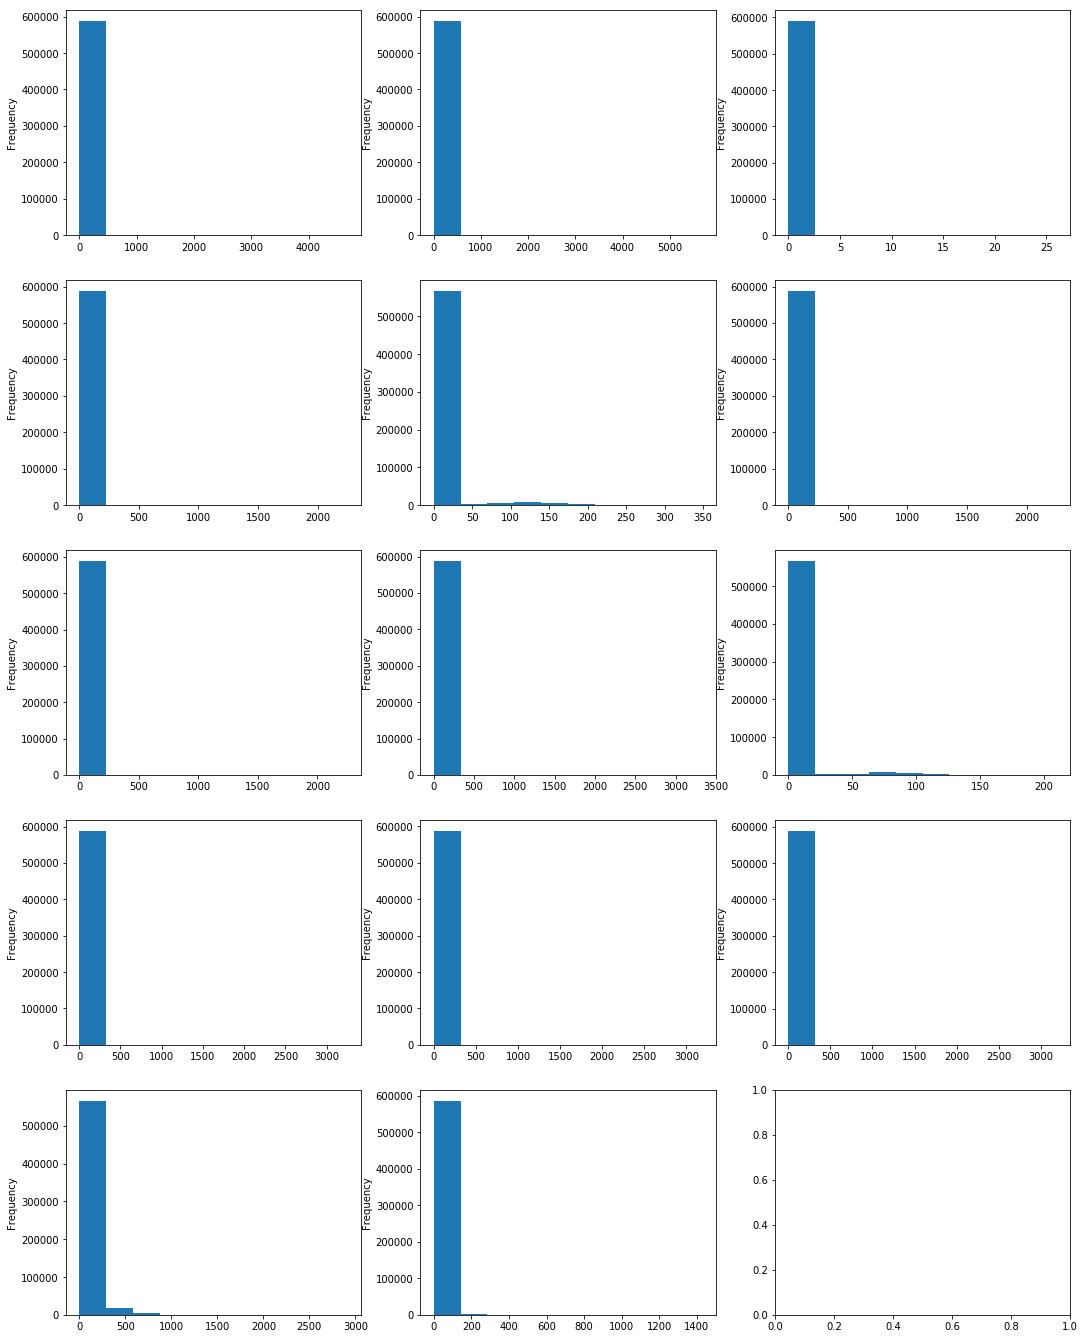

In [51]:
fig, axarr = plt.subplots(5,3,figsize=(18,24))

train_transaction['C1'].plot.hist(ax=axarr[0][0])
train_transaction['C2'].plot.hist(ax=axarr[0][1])
train_transaction['C3'].plot.hist(ax=axarr[0][2])
train_transaction['C4'].plot.hist(ax=axarr[1][0])
train_transaction['C5'].plot.hist(ax=axarr[1][1])
train_transaction['C6'].plot.hist(ax=axarr[1][2])
train_transaction['C7'].plot.hist(ax=axarr[2][0])
train_transaction['C8'].plot.hist(ax=axarr[2][1])
train_transaction['C9'].plot.hist(ax=axarr[2][2])
train_transaction['C10'].plot.hist(ax=axarr[3][0])
train_transaction['C11'].plot.hist(ax=axarr[3][1])
train_transaction['C12'].plot.hist(ax=axarr[3][2])
train_transaction['C13'].plot.hist(ax=axarr[4][0])
train_transaction['C14'].plot.hist(ax=axarr[4][1])

In [55]:
print(
    train_transaction['C1'].describe(),
    train_transaction['C2'].describe(),
    train_transaction['C3'].describe(),
    train_transaction['C4'].describe(),
    train_transaction['C5'].describe(),
    train_transaction['C6'].describe(),
    train_transaction['C7'].describe(),
    train_transaction['C8'].describe(),
    train_transaction['C9'].describe(),
    train_transaction['C10'].describe(),
    train_transaction['C11'].describe(),
    train_transaction['C12'].describe(),
    train_transaction['C13'].describe(),
    train_transaction['C14'].describe()
)

count    590540.000000
mean         14.092458
std         133.569018
min           0.000000
25%           1.000000
50%           1.000000
75%           3.000000
max        4685.000000
Name: C1, dtype: float64 count    590540.000000
mean         15.269734
std         154.668899
min           0.000000
25%           1.000000
50%           1.000000
75%           3.000000
max        5691.000000
Name: C2, dtype: float64 count    590540.000000
mean          0.005644
std           0.150536
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          26.000000
Name: C3, dtype: float64 count    590540.000000
mean          4.092185
std          68.848459
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max        2253.000000
Name: C4, dtype: float64 count    590540.000000
mean          5.571526
std          25.786976
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max

Just like with most count variables, it seems like there's a very large concentration of small numbers being skewed by extreme tail values. I'll take a look as to whether extreme values are correlated with fraudulent behaviour or not.

In [64]:
print(
    pearsonr(train_transaction['C1']>=1,fraud),
    pearsonr(train_transaction['C2']>=1,fraud),
    pearsonr(train_transaction['C3']>=1,fraud),
    pearsonr(train_transaction['C4']>=1,fraud),
    pearsonr(train_transaction['C5']>=1,fraud),
    pearsonr(train_transaction['C6']>=1,fraud),
    pearsonr(train_transaction['C7']>=1,fraud),
    pearsonr(train_transaction['C8']>=1,fraud),
    pearsonr(train_transaction['C9']>=1,fraud),
    pearsonr(train_transaction['C10']>=1,fraud),
    pearsonr(train_transaction['C11']>=1,fraud),
    pearsonr(train_transaction['C12']>=1,fraud),
    pearsonr(train_transaction['C13']>=1,fraud),
    pearsonr(train_transaction['C14']>=1,fraud)
)

(-0.05186603822308895, 0.0) (-0.0025242160385961013, 0.052407259300821324) (-0.011517502912092187, 8.667309561594057e-19) (0.14347689846783207, 0.0) (-0.10936259400739277, 0.0) (0.006037107278912272, 3.495165780303753e-06) (0.16092976240537776, 0.0) (0.13573515577209436, 0.0) (-0.11593935482806846, 0.0) (0.1357599944936587, 0.0) (-0.010149372021661543, 6.208810184603999e-15) (0.14459742114365842, 0.0) (-0.14585862846554387, 0.0) (-0.15248367154675468, 0.0)


As I suspected, it turns out that for some count variables, having large value is correlated (both negatively and positively) with the probability of fraud. Let's look at this in more detail. I will create a function to loop through different thresholds to determine what separates fraudulent transactions. This is probably similar to what a tree based algorithm might do, but I'd like to look at it in more detail.

In [81]:
counts = ['C1','C2','C3','C4','C5','C6','C7','C8','C9','C10','C11','C12','C13','C14']
thresholds = np.arange(0,20)

max_corrs=pd.DataFrame()
for c in counts:
    corr_temp = []
    for t in thresholds:
        corr_temp.append([abs(pearsonr(train_transaction[c]>=t,fraud)[0]),t])
    corr_temp = pd.DataFrame(corr_temp,columns=['Absolute Correlation','Threshold'])
    max_corr_loc = corr_temp['Absolute Correlation'].idxmax
    max_corr = corr_temp.iloc[max_corr_loc,:]
    max_corrs = max_corrs.append(max_corr)

print(max_corrs)

    Absolute Correlation  Threshold
8               0.091588        8.0
10              0.096240       10.0
1               0.011518        1.0
4               0.228593        4.0
1               0.109363        1.0
4               0.057959        4.0
4               0.245757        4.0
3               0.210572        3.0
1               0.115939        1.0
2               0.193729        2.0
4               0.077373        4.0
4               0.243142        4.0
1               0.145859        1.0
1               0.152484        1.0


Some variables seem to do reasonably well in splitting fraudulent data from true transactions. Let's move onto the time deltas.

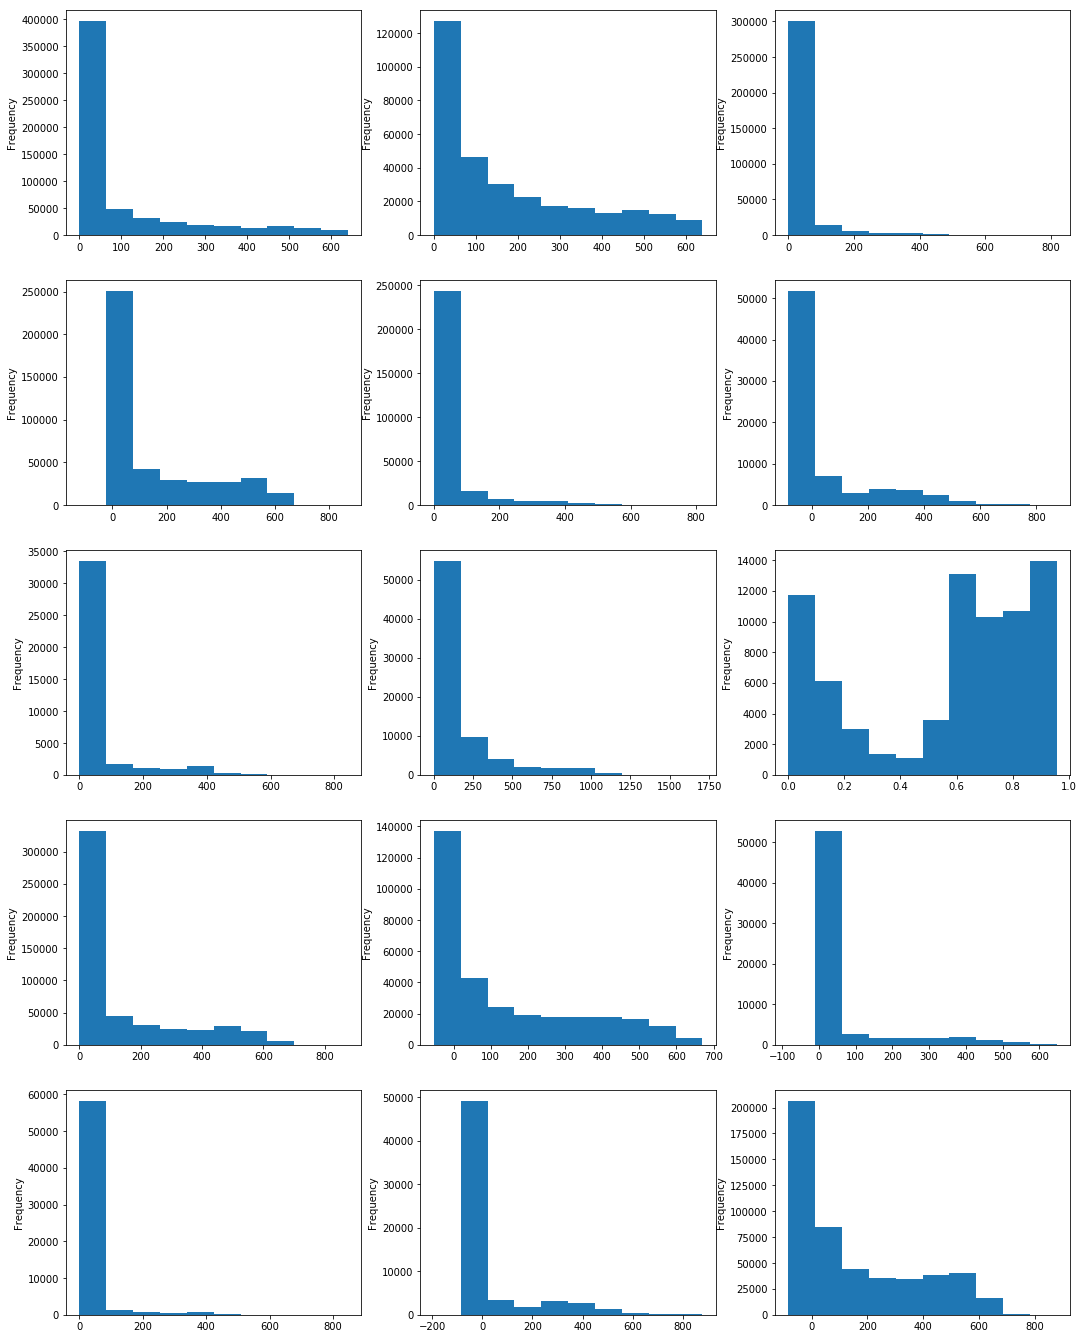

In [82]:
fig, axarr = plt.subplots(5,3,figsize=(18,24))

train_transaction['D1'].plot.hist(ax=axarr[0][0])
train_transaction['D2'].plot.hist(ax=axarr[0][1])
train_transaction['D3'].plot.hist(ax=axarr[0][2])
train_transaction['D4'].plot.hist(ax=axarr[1][0])
train_transaction['D5'].plot.hist(ax=axarr[1][1])
train_transaction['D6'].plot.hist(ax=axarr[1][2])
train_transaction['D7'].plot.hist(ax=axarr[2][0])
train_transaction['D8'].plot.hist(ax=axarr[2][1])
train_transaction['D9'].plot.hist(ax=axarr[2][2])
train_transaction['D10'].plot.hist(ax=axarr[3][0])
train_transaction['D11'].plot.hist(ax=axarr[3][1])
train_transaction['D12'].plot.hist(ax=axarr[3][2])
train_transaction['D13'].plot.hist(ax=axarr[4][0])
train_transaction['D14'].plot.hist(ax=axarr[4][1])
train_transaction['D15'].plot.hist(ax=axarr[4][2])

This is interesting, looks like there are some negative time deltas...

Most of the values seem to be on roughly the same scale except D9, this might be the number of days between the transaction and the settlement of payment (we expect it to be very low).

In [89]:
train_transaction.iloc[:,30:60].corrwith(fraud)

C14    0.007921
D1    -0.067193
D2    -0.083583
D3    -0.046271
D4    -0.067216
D5    -0.064638
D6    -0.057236
D7    -0.127199
D8    -0.142636
D9    -0.044253
D10   -0.072002
D11   -0.045094
D12   -0.028864
D13   -0.059430
D14   -0.008663
D15   -0.077519
V1     0.001045
V2     0.019872
V3     0.049257
V4     0.012611
V5     0.036904
dtype: float64

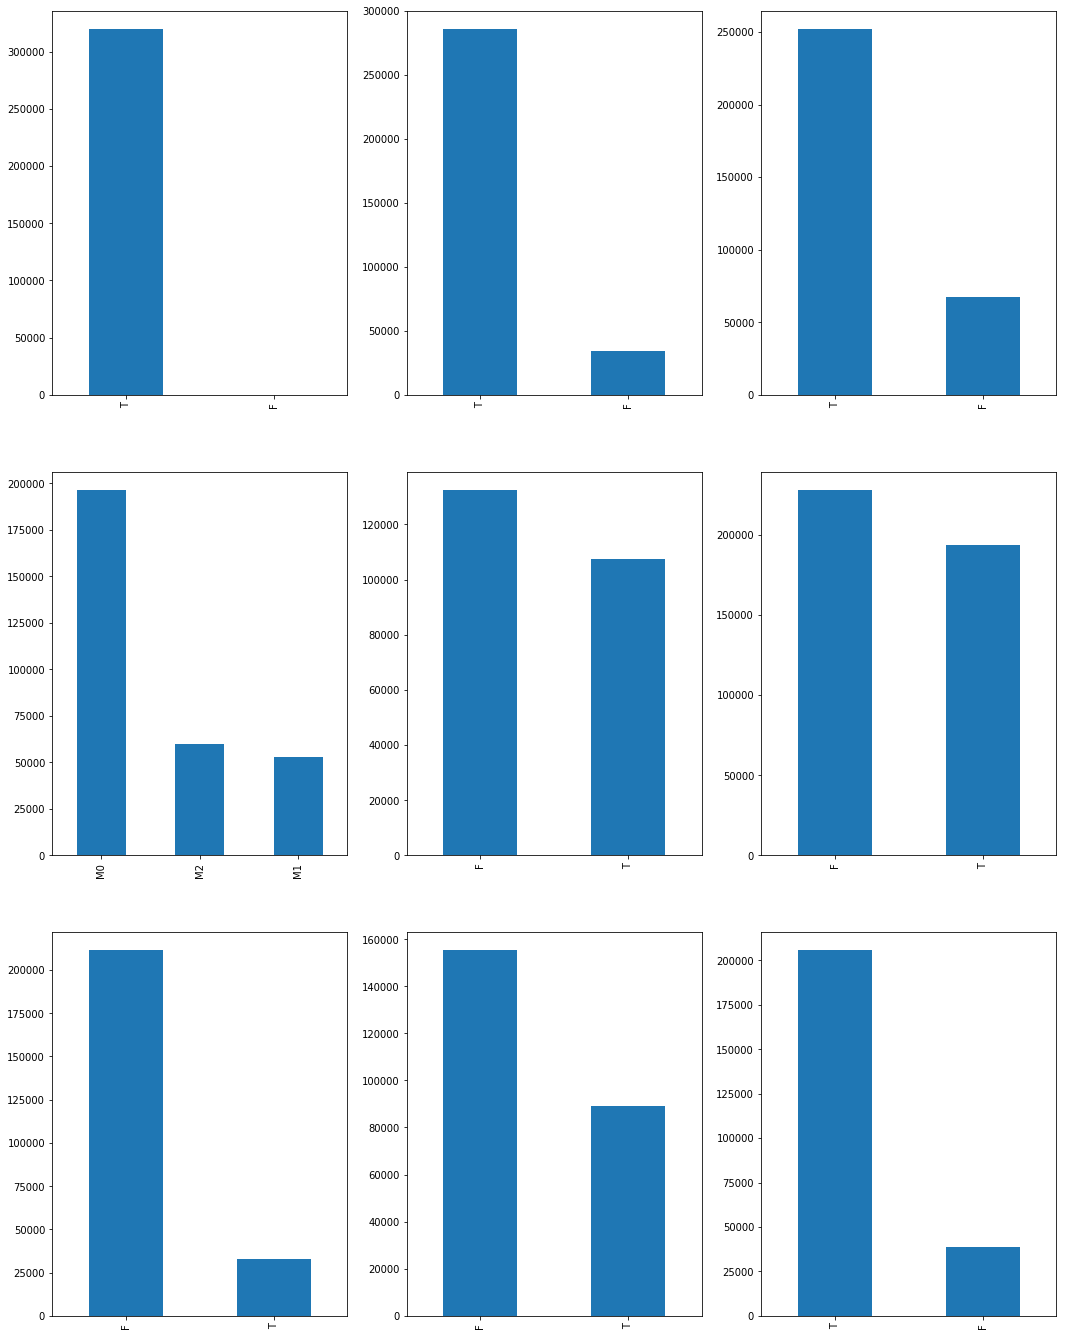

In [94]:
fig, axarr = plt.subplots(3,3,figsize=(18,24))
train_transaction['M1'].value_counts().head(10).plot.bar(ax=axarr[0][0])
train_transaction['M2'].value_counts().head(10).plot.bar(ax=axarr[0][1])
train_transaction['M3'].value_counts().head(10).plot.bar(ax=axarr[0][2])
train_transaction['M4'].value_counts().head(10).plot.bar(ax=axarr[1][0])
train_transaction['M5'].value_counts().head(10).plot.bar(ax=axarr[1][1])
train_transaction['M6'].value_counts().head(10).plot.bar(ax=axarr[1][2])
train_transaction['M7'].value_counts().head(10).plot.bar(ax=axarr[2][0])
train_transaction['M8'].value_counts().head(10).plot.bar(ax=axarr[2][1])
train_transaction['M9'].value_counts().head(10).plot.bar(ax=axarr[2][2])

Competition host says that: "M1-M9: match, such as names on card and address, etc.", not really sure what to make of it.

In [102]:
#train_transaction[['M1','M2','M3','M4','M5','M6','M7','M8','M9']].corrwith(fraud)
matches = train_transaction[['M1','M2','M3','M4','M5','M6','M7','M8','M9']]
matches_dummies = pd.get_dummies(matches)
matches_dummies.corrwith(fraud)

M1_F    -0.001239
M1_T    -0.089400
M2_F    -0.000185
M2_T    -0.089079
M3_F    -0.009260
M3_T    -0.084136
M4_M0    0.006372
M4_M1   -0.013542
M4_M2    0.143940
M5_F    -0.024783
M5_T     0.006953
M6_F    -0.048760
M6_T    -0.068134
M7_F    -0.063570
M7_T    -0.017003
M8_F    -0.043108
M8_T    -0.043045
M9_F    -0.007183
M9_T    -0.068434
dtype: float64

Mostly uninteresting, however, for variable M4, those who are of type M2 are more likely to engage in fraudulent behaviour.

Slight diversion, but let's create a new dataframe to indicate whether each observation/variable pair is NaN and test to see whether or not it will be correlated with the isFraud dependent variable. Maybe I'll move this someplace else later

In [38]:
transaction_na = train_transaction.isna()
transaction_na = transaction_na.drop(['TransactionID','isFraud','TransactionDT'],axis=1)
print(transaction_na)

        TransactionAmt  ProductCD  card1  card2  card3  card4  card5  card6  \
0                False      False  False   True  False  False  False  False   
1                False      False  False  False  False  False  False  False   
2                False      False  False  False  False  False  False  False   
3                False      False  False  False  False  False  False  False   
4                False      False  False  False  False  False  False  False   
5                False      False  False  False  False  False  False  False   
6                False      False  False  False  False  False  False  False   
7                False      False  False  False  False  False  False  False   
8                False      False  False  False  False  False  False  False   
9                False      False  False  False  False  False  False  False   
10               False      False  False  False  False  False  False  False   
11               False      False  False  False  Fal

In [39]:
#Calculating correlations
na_corrs_abs = transaction_na.corrwith(fraud).abs().sort_values(ascending=False)
print(na_corrs_abs)

D7                0.164478
addr1             0.159479
addr2             0.159479
D12               0.157344
D14               0.151227
D6                0.144233
D9                0.144123
D8                0.144123
D13               0.140420
R_emaildomain     0.140127
V197              0.133923
V184              0.133923
V185              0.133923
V189              0.133923
V201              0.133923
V200              0.133923
V198              0.133923
V194              0.133923
V188              0.133923
V195              0.133923
V174              0.133923
V171              0.133923
V180              0.133923
V209              0.133923
V210              0.133923
V175              0.133923
V169              0.133923
V208              0.133923
V170              0.133923
V216              0.133455
                    ...   
V113              0.002404
V288              0.000318
V281              0.000318
V289              0.000318
V296              0.000318
D1                0.000318
V

In [10]:
strings = train_transaction.select_dtypes(include='object')
numerics = train_transaction.select_dtypes(exclude='object')
dummies = pd.get_dummies(strings)
x_trans = pd.concat([dummies, numerics],axis=1)
x_trans = x_trans.drop(['TransactionID','isFraud'],axis=1)


In [11]:
x_trans.head()

,ProductCD_C,ProductCD_H,ProductCD_R,ProductCD_S,ProductCD_W,card4_american express,card4_discover,card4_mastercard,card4_visa,card6_charge card,card6_credit,card6_debit,card6_debit or credit,P_emaildomain_aim.com,P_emaildomain_anonymous.com,P_emaildomain_aol.com,P_emaildomain_att.net,P_emaildomain_bellsouth.net,P_emaildomain_cableone.net,P_emaildomain_centurylink.net,P_emaildomain_cfl.rr.com,P_emaildomain_charter.net,P_emaildomain_comcast.net,P_emaildomain_cox.net,P_emaildomain_earthlink.net,P_emaildomain_embarqmail.com,P_emaildomain_frontier.com,P_emaildomain_frontiernet.net,P_emaildomain_gmail,P_emaildomain_gmail.com,P_emaildomain_gmx.de,P_emaildomain_hotmail.co.uk,P_emaildomain_hotmail.com,P_emaildomain_hotmail.de,P_emaildomain_hotmail.es,P_emaildomain_hotmail.fr,P_emaildomain_icloud.com,P_emaildomain_juno.com,P_emaildomain_live.com,P_emaildomain_live.com.mx,P_emaildomain_live.fr,P_emaildomain_mac.com,P_emaildomain_mail.com,P_emaildomain_me.com,P_emaildomain_msn.com,P_emaildomain_netzero.com,P_emaildomain_netzero.net,P_emaildomain_optonline.net,P_emaildomain_outlook.com,P_emaildomain_outlook.es,P_emaildomain_prodigy.net.mx,P_emaildomain_protonmail.com,P_emaildomain_ptd.net,P_emaildomain_q.com,P_emaildomain_roadrunner.com,P_emaildomain_rocketmail.com,P_emaildomain_sbcglobal.net,P_emaildomain_sc.rr.com,P_emaildomain_servicios-ta.com,P_emaildomain_suddenlink.net,P_emaildomain_twc.com,P_emaildomain_verizon.net,P_emaildomain_web.de,P_emaildomain_windstream.net,P_emaildomain_yahoo.co.jp,P_emaildomain_yahoo.co.uk,P_emaildomain_yahoo.com,P_emaildomain_yahoo.com.mx,P_emaildomain_yahoo.de,P_emaildomain_yahoo.es,P_emaildomain_yahoo.fr,P_emaildomain_ymail.com,R_emaildomain_aim.com,R_emaildomain_anonymous.com,R_emaildomain_aol.com,R_emaildomain_att.net,R_emaildomain_bellsouth.net,R_emaildomain_cableone.net,R_emaildomain_centurylink.net,R_emaildomain_cfl.rr.com,R_emaildomain_charter.net,R_emaildomain_comcast.net,R_emaildomain_cox.net,R_emaildomain_earthlink.net,R_emaildomain_embarqmail.com,R_emaildomain_frontier.com,R_emaildomain_frontiernet.net,R_emaildomain_gmail,R_emaildomain_gmail.com,R_emaildomain_gmx.de,R_emaildomain_hotmail.co.uk,R_emaildomain_hotmail.com,R_emaildomain_hotmail.de,R_emaildomain_hotmail.es,R_emaildomain_hotmail.fr,R_emaildomain_icloud.com,R_emaildomain_juno.com,R_emaildomain_live.com,R_emaildomain_live.com.mx,R_emaildomain_live.fr,R_emaildomain_mac.com,R_emaildomain_mail.com,R_emaildomain_me.com,R_emaildomain_msn.com,R_emaildomain_netzero.com,R_emaildomain_netzero.net,R_emaildomain_optonline.net,R_emaildomain_outlook.com,R_emaildomain_outlook.es,R_emaildomain_prodigy.net.mx,R_emaildomain_protonmail.com,R_emaildomain_ptd.net,R_emaildomain_q.com,R_emaildomain_roadrunner.com,R_emaildomain_rocketmail.com,R_emaildomain_sbcglobal.net,R_emaildomain_sc.rr.com,R_emaildomain_scranton.edu,R_emaildomain_servicios-ta.com,R_emaildomain_suddenlink.net,R_emaildomain_twc.com,R_emaildomain_verizon.net,R_emaildomain_web.de,R_emaildomain_windstream.net,R_emaildomain_yahoo.co.jp,R_emaildomain_yahoo.co.uk,R_emaildomain_yahoo.com,R_emaildomain_yahoo.com.mx,R_emaildomain_yahoo.de,R_emaildomain_yahoo.es,R_emaildomain_yahoo.fr,R_emaildomain_ymail.com,M1_F,M1_T,M2_F,M2_T,M3_F,M3_T,M4_M0,M4_M1,M4_M2,M5_F,M5_T,M6_F,M6_T,M7_F,M7_T,M8_F,M8_T,M9_F,M9_T,TransactionDT,TransactionAmt,card1,card2,card3,card5,addr1,addr2,dist1,dist2,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,D15,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,V41,V42,V43,V44,V45,V46,V47,V48,V49,V50,V51,V52,V53,V54,V55,V56,V57,V58,V59,V60,V61,V62,V63,V64,V65,V66,V67,V68,V69,V70,V71,V72,V73,V74,V75,V76,V77,V78,V79,V80,V81,V82,V83,V84,V85,V86,V87,V88,V89,V90,V91,V92,V93,V94,V95,V96,V97,V98,V99,V100,V101,V102,V103,V104,V105,V106,V107,V108,V109,V110,V111,V112,V113,V114,V115,V116,V117,V118,V119,V120,V121,V122,V123,V124,V125,V126,V127,V128,

In [12]:
transaction_na_count = x_trans.isnull().sum()
transaction_na_prop = x_trans.isnull().sum()/x_trans.shape[0]*100
transaction_na = pd.concat([transaction_na_count, transaction_na_prop], axis=1)
transaction_na.columns = ['Count','Percentage']
print(transaction_na)

                                Count  Percentage
ProductCD_C                         0    0.000000
ProductCD_H                         0    0.000000
ProductCD_R                         0    0.000000
ProductCD_S                         0    0.000000
ProductCD_W                         0    0.000000
card4_american express              0    0.000000
card4_discover                      0    0.000000
card4_mastercard                    0    0.000000
card4_visa                          0    0.000000
card6_charge card                   0    0.000000
card6_credit                        0    0.000000
card6_debit                         0    0.000000
card6_debit or credit               0    0.000000
P_emaildomain_aim.com               0    0.000000
P_emaildomain_anonymous.com         0    0.000000
P_emaildomain_aol.com               0    0.000000
P_emaildomain_att.net               0    0.000000
P_emaildomain_bellsouth.net         0    0.000000
P_emaildomain_cableone.net          0    0.000000


Many of the variables have a high proportion of missing data (>50%) which will mess with any of our machine learning models, so we're going to fill the nas with the mean value. (We will also experiment with filling it with zeros, and for categorical variables creating a separate dummy, or filling with the most common value)

In [13]:
x_trans = x_trans.fillna(x_trans.mean())

In [14]:
corrs = x_trans.corrwith(fraud)
print(abs(corrs).sort_values(ascending=False))

V257                            0.262946
V246                            0.251838
V244                            0.249951
V242                            0.247522
V45                             0.236688
V201                            0.234520
V200                            0.227926
V86                             0.224530
V87                             0.224450
V189                            0.220374
V44                             0.218669
V188                            0.217058
V258                            0.203975
V52                             0.201111
V51                             0.187440
V228                            0.184556
V170                            0.178601
V40                             0.178413
V79                             0.173097
V39                             0.170565
V94                             0.167984
V38                             0.167128
V43                             0.166514
V33                             0.165534
V199            

Since there's literally hundreds of variables, we'll try some dimension reduction (PCA) and see how they correlate with the dependent variable

In [16]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 5)
x_components = pca.fit_transform(x_trans)
x_components = pd.DataFrame(data=x_components, columns=['PC1','PC2','PC3','PC4','PC5'])

In [18]:

x_components.head()

,PC1,PC2,PC3,PC4,PC5
0,-7.285906e+06,-8614.109434,1214.333797,-4090.730880,-217.426114
1,-7.285905e+06,-8618.423120,871.942767,7075.733008,-255.498278
2,-7.285837e+06,-8617.418693,908.453393,5168.245582,-262.408958
3,-7.285807e+06,-8632.266138,3626.582226,-8259.347442,1073.567132
4,-7.285946e+06,114177.098244,278.438306,5374.297539,705.847243


In [20]:
pca_corrs = x_components.corrwith(fraud)
print(pca_corrs)

PC1    0.013103
PC2   -0.024867
PC3   -0.007516
PC4    0.013149
PC5    0.032588
dtype: float64


Correlations don't look very good! Perhaps we need a different approach....